# Project Name : - Algerian Forest Fire Dataset EDA , FE. Fire Prediction using Logistic regression. 

1) Problem statement .

This dataset comprises of Algerian Forest Fire Dataset taken from UCI .
Link of the dataset is as follows :- https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++ .

2) Data Collection.


This dataset includes 244 instances that regroup a data of 2 regions of Algeria,namely the Brjajia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria .
122 instances for each region .
The Period is from June 2012 to September 2012.The Dataset includes 11 attributes and 1 output attribute i.e. Temperature
The data consists of 14 column and 246 rows.

**Attribute Information :-**

**Period Covered**

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations

Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90

Ws :Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8

**FWI Components**

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI system: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [3]:
df= pd.read_csv('C:/Users/nizam/Downloads/EDA/Algerian_forest_fires_dataset_UPDATE.csv',header=1) # loading the data set

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# EDA

In [5]:
df.shape

(246, 14)

In [6]:
# Data has 14 feature and 246 Rows 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [8]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [9]:
df[df.isna().any(axis=1)] # to find the nan row in our data 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [10]:
df.drop([167],inplace=True)
df.drop([122],inplace=True)

In [11]:
df.iloc[121:125,:] # nan values has been removed 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [12]:
df.drop([123],inplace=True)

In [13]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1
# splitting the data  and creating the  new column 

In [14]:
df.isnull().sum() # all nan values has been  removed 

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [15]:
df.describe()


,Region
count,243.000000
mean,0.497942
std,0.501028
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Region,243.0,0.497942,0.501028,0.0,0.0,0.0,1.0,1.0


# Checking the Column Headers

In [17]:
df.columns


Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [18]:
#Removing unnecessary space in column headers using str.strip()
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

# Converting the necessary column dataye to int

In [19]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

In [20]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]].astype(int)

In [21]:
df.dtypes

day             int32
month           int32
year            int32
Temperature     int32
RH              int32
Ws              int32
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

In [22]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

# Values in df[Classes] has unnecessary spaces that are removed by str.strip()

In [23]:
df.Classes=df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

# Converting the Necessary Column Datatype to Float

In [24]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [25]:
df.year.unique()

array([2012])

# Dropping the year column as the data is for the same year

In [26]:
df1=df.drop(['year'],axis=1)

In [27]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


In [28]:
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

Encoding not fire as 0 and Fire as 1

In [29]:
#df1['Classes']=np.where(df1['Classes']=='not fire',0,1)


In [30]:
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [31]:
#pd.get_dummies(df1['Classes'])

In [32]:
df1['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [33]:
df1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [34]:
df1['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [35]:
df1.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.263197


In [36]:
# Printing all the categorical columns
categorical_col = [fea for fea in df1.columns if df1[fea].dtype == 'O']
print('Categorical columns--',categorical_col)

# Printing all the numerical columns
numerical_col = [fea for fea in df1.columns if df1[fea].dtype != 'O']
print('Numerical columns--',numerical_col)



Categorical columns-- ['Classes']
Numerical columns-- ['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']


In [37]:
### OR
#numeric= [  feature for feature in df1.columns if df[feature].dtype !='O']
#categorical =  [  feature for feature in df1.columns if df[feature].dtype =='O']

In [38]:
df1.dtypes

day              int32
month            int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

In [39]:
df1['Classes']

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
241        fire
242    not fire
243    not fire
244    not fire
245    not fire
Name: Classes, Length: 243, dtype: object

In [40]:
df1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


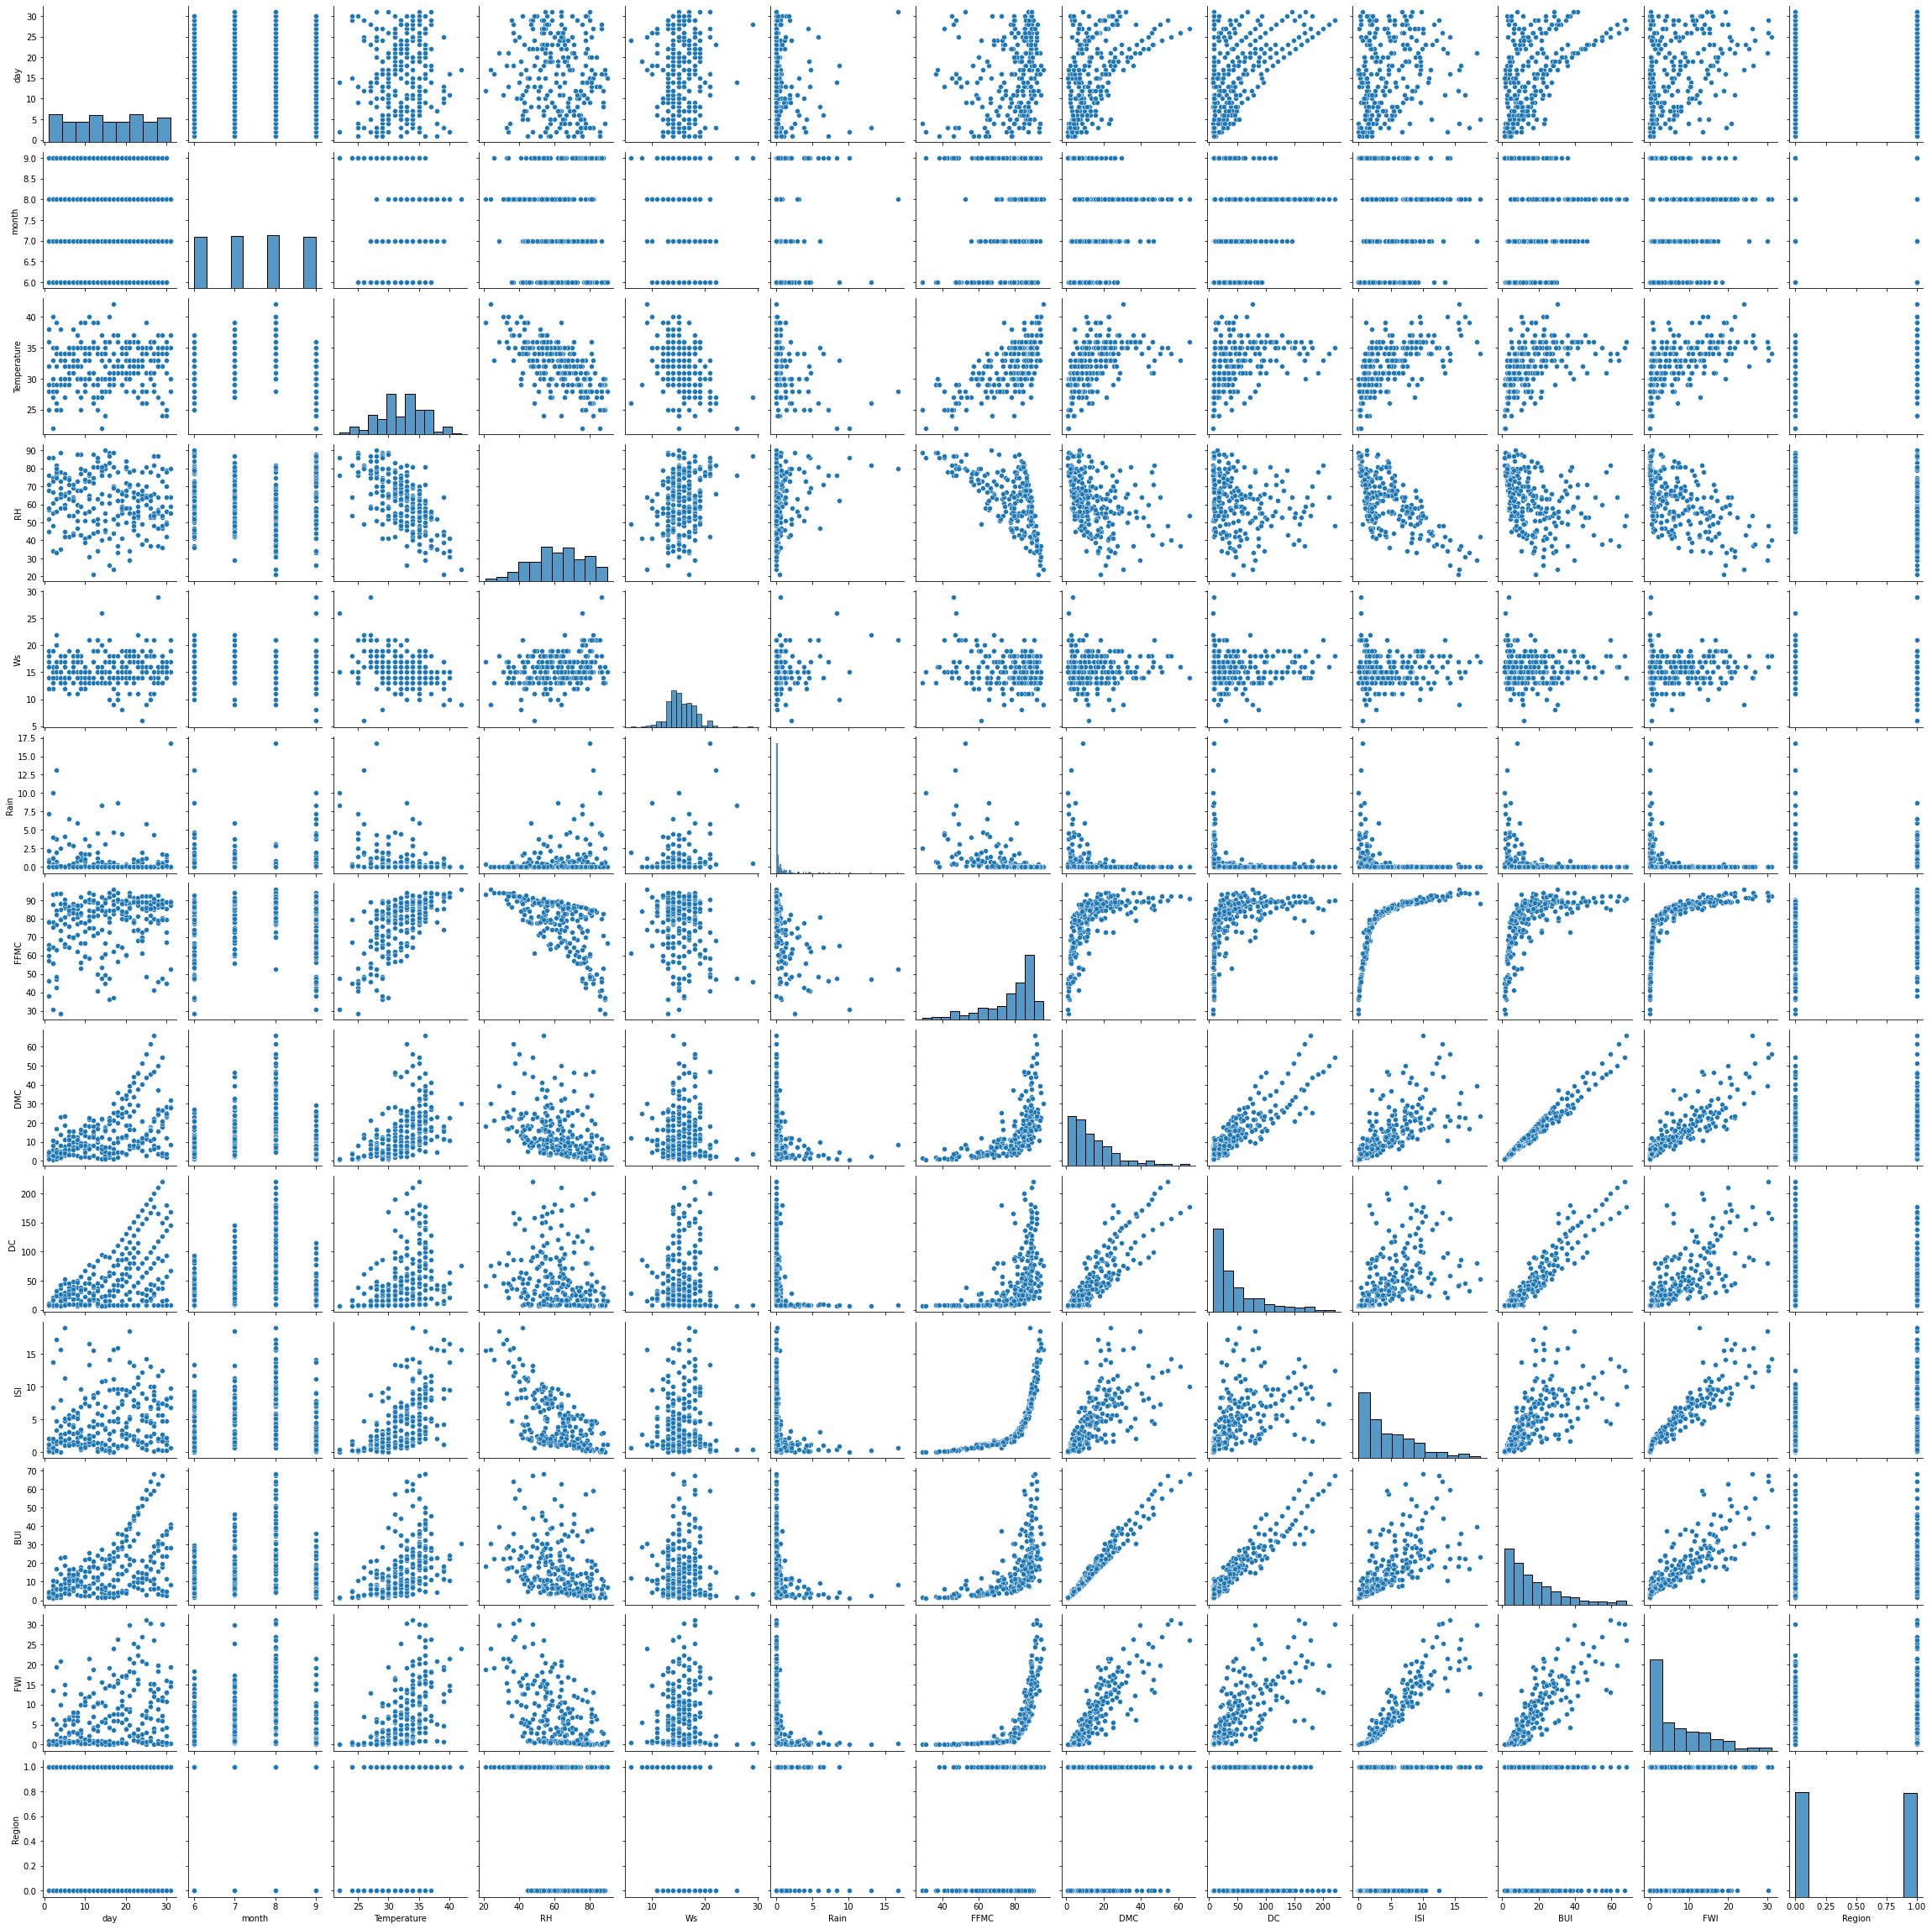

In [41]:
sns.pairplot(df1)

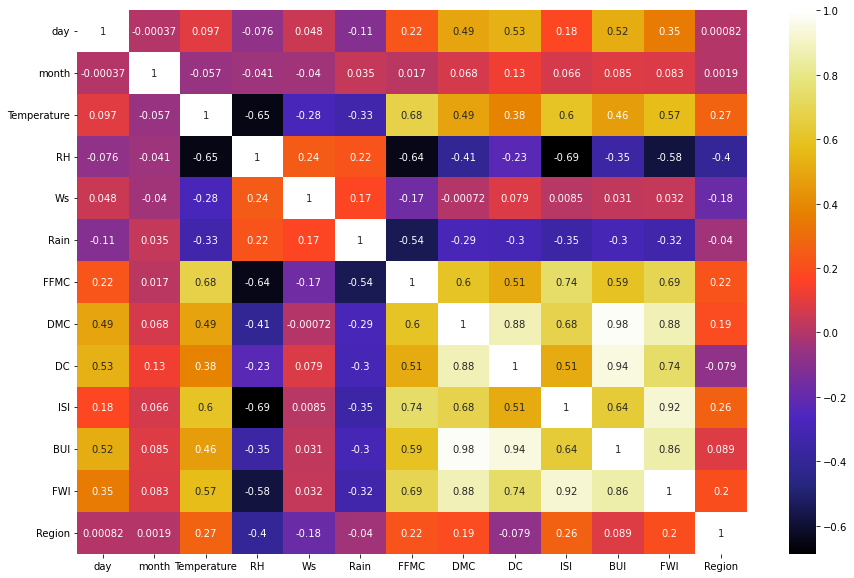

In [43]:
plt.figure(figsize = (15,10))
sns.heatmap(df1[numerical_col].corr(), cmap="CMRmap", annot=True)
plt.show()

<AxesSubplot:>

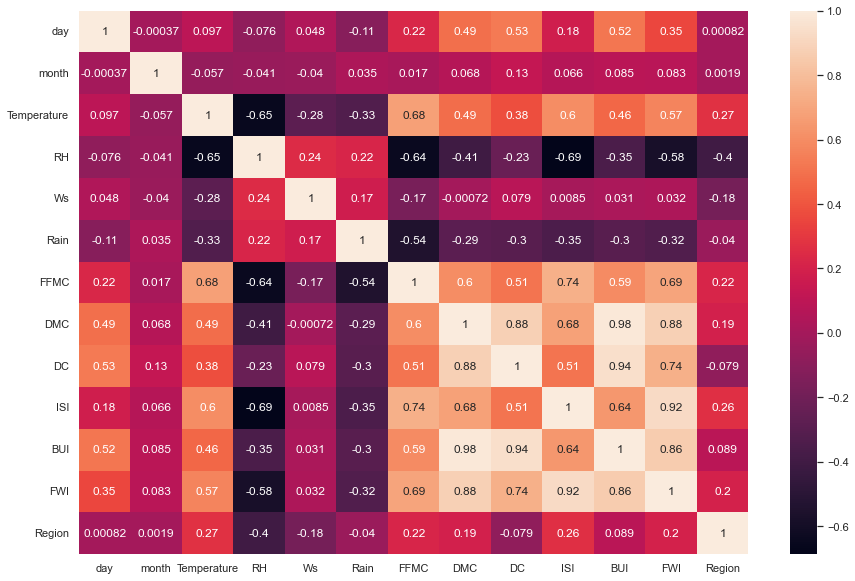

In [48]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df1.corr(),annot=True)

# Report



RH is negatively corelated with Temperature, FFMC and ISI

Rain is negatively correlated with Temperature and FFMC,DMC, ISI and BUI

Text(0, 0.5, 'Temperature')

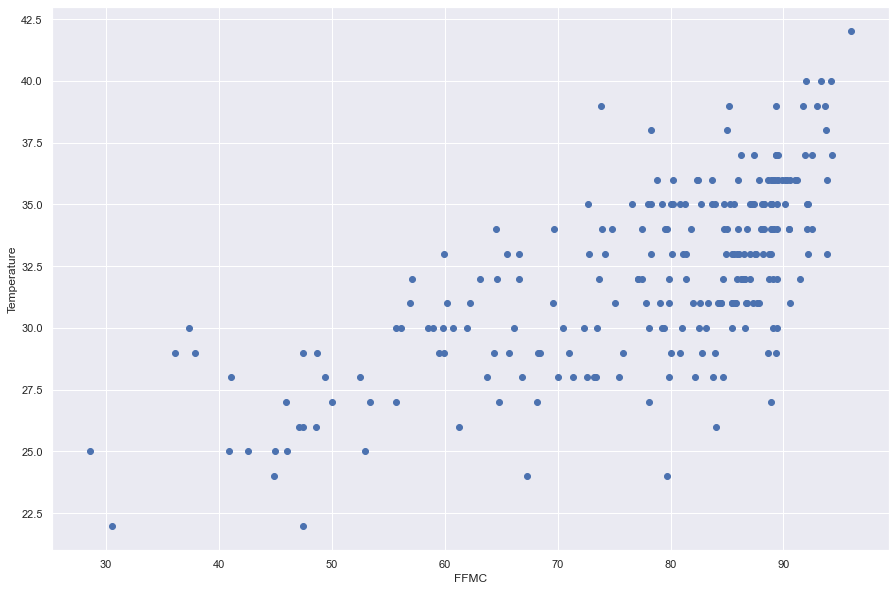

In [49]:
plt.scatter(df1['FFMC'],df1['Temperature'])
plt.xlabel("FFMC")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

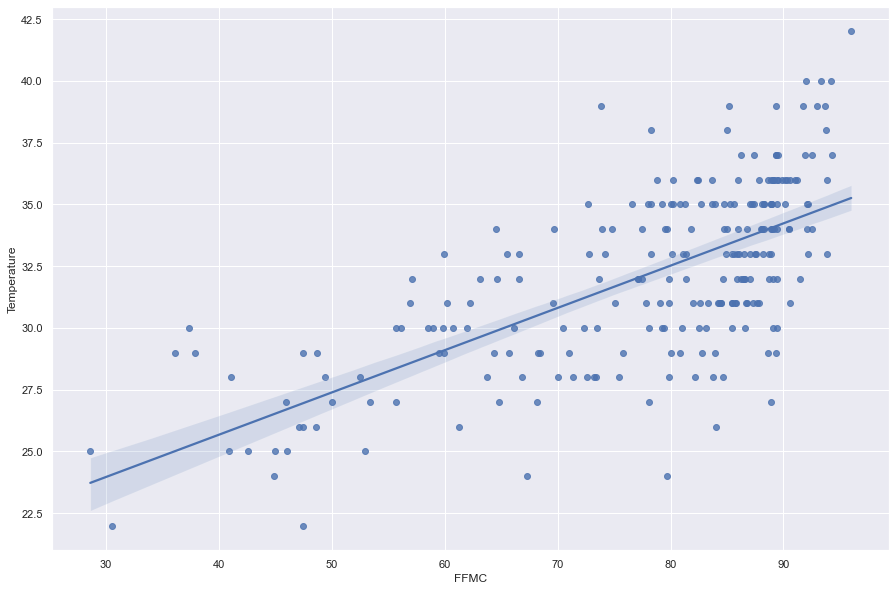

In [50]:
sns.regplot(x='FFMC',y='Temperature',data=df1)

Text(0, 0.5, 'Temperature')

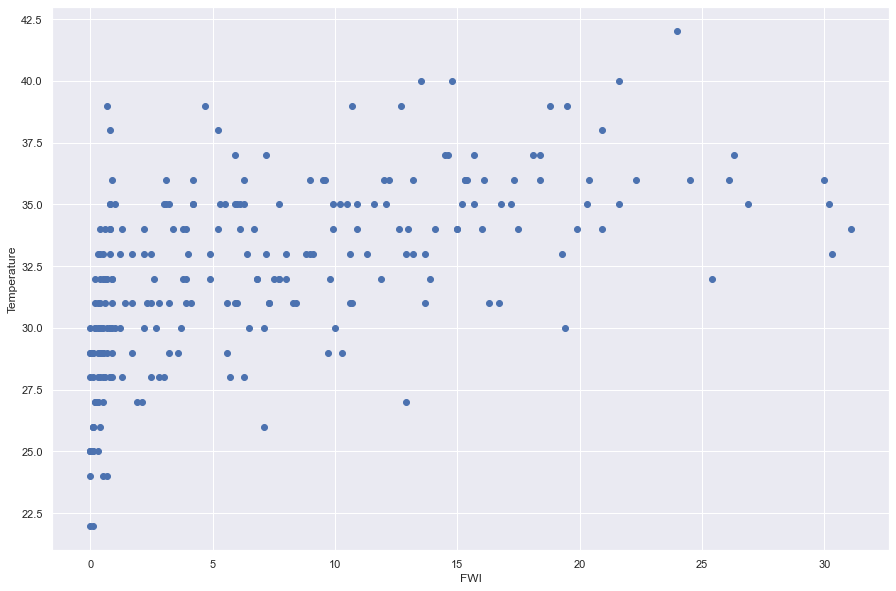

In [51]:
plt.scatter(df1['FWI'],df1['Temperature'])
plt.xlabel("FWI")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='FWI', ylabel='Temperature'>

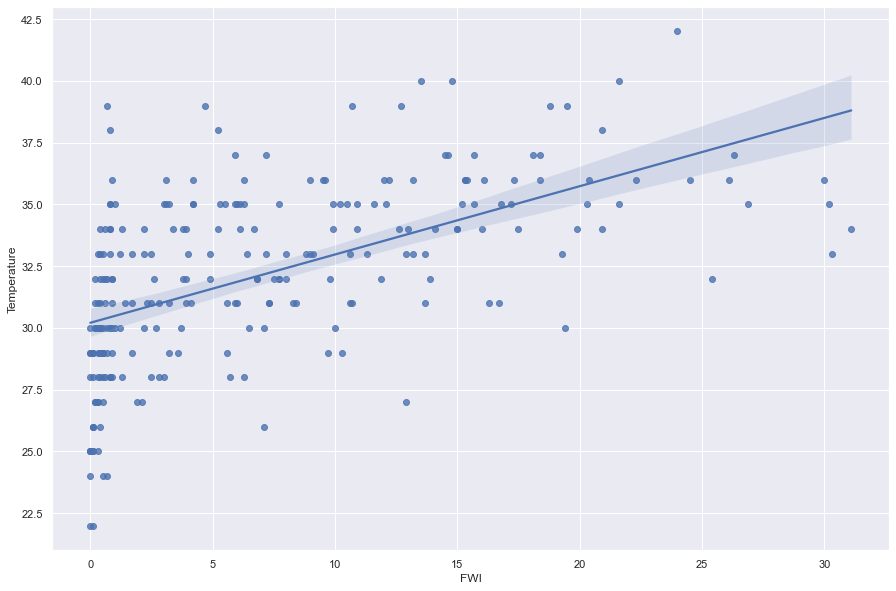

In [52]:
sns.regplot(x='FWI',y='Temperature',data=df1)

Text(0, 0.5, 'Temperature')

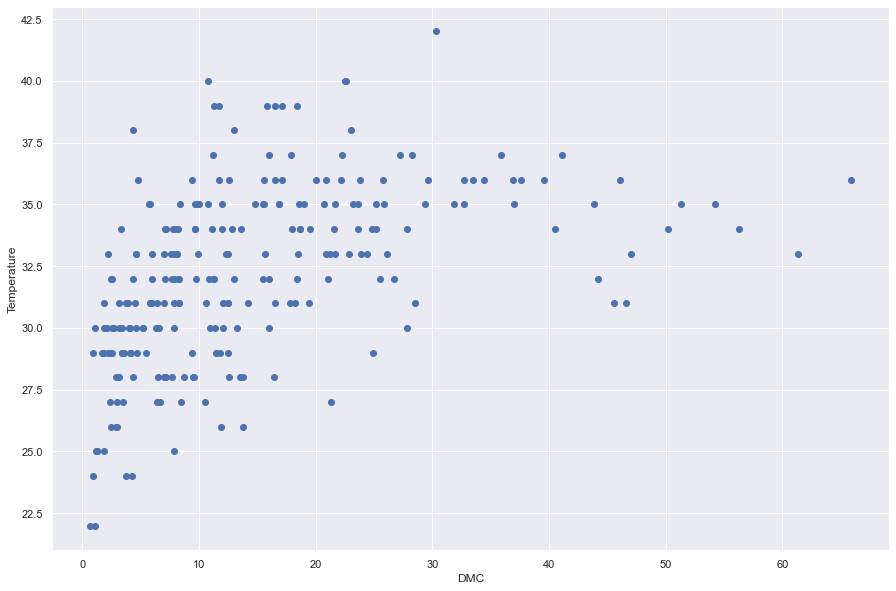

In [53]:
plt.scatter(df1['DMC'],df1['Temperature'])
plt.xlabel("DMC")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='DMC', ylabel='Temperature'>

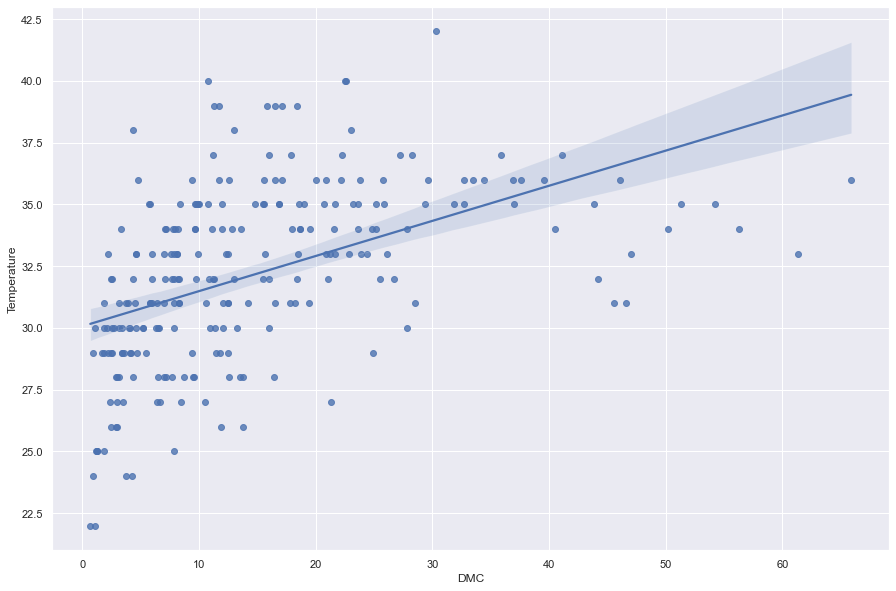

In [54]:
sns.regplot(x='DMC',y='Temperature',data=df1)

**Distribution Numerical Features of our Dataset**

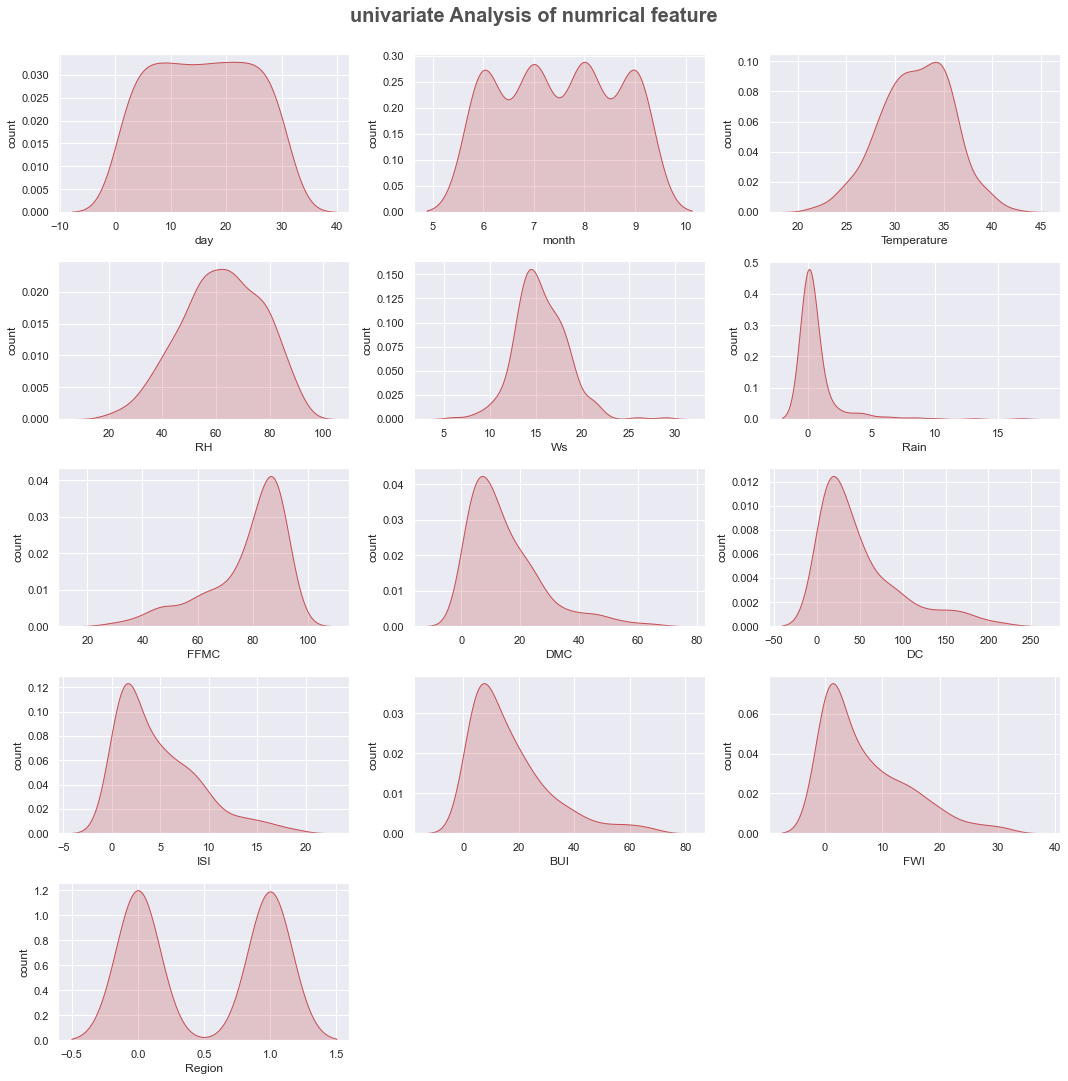

In [55]:
plt.figure(figsize=(15,15))
plt.suptitle ('univariate Analysis of numrical feature' , fontsize = 20, fontweight= 'bold', alpha= .8, y=1 )
for i in range (0, len(numerical_col)):
    plt.subplot(5,3,i+1 )
    sns.kdeplot(x= df1[numerical_col[i]], shade=True, color='r')
    plt.xlabel(numerical_col[i])
    plt.ylabel('count')
    
    plt.tight_layout()

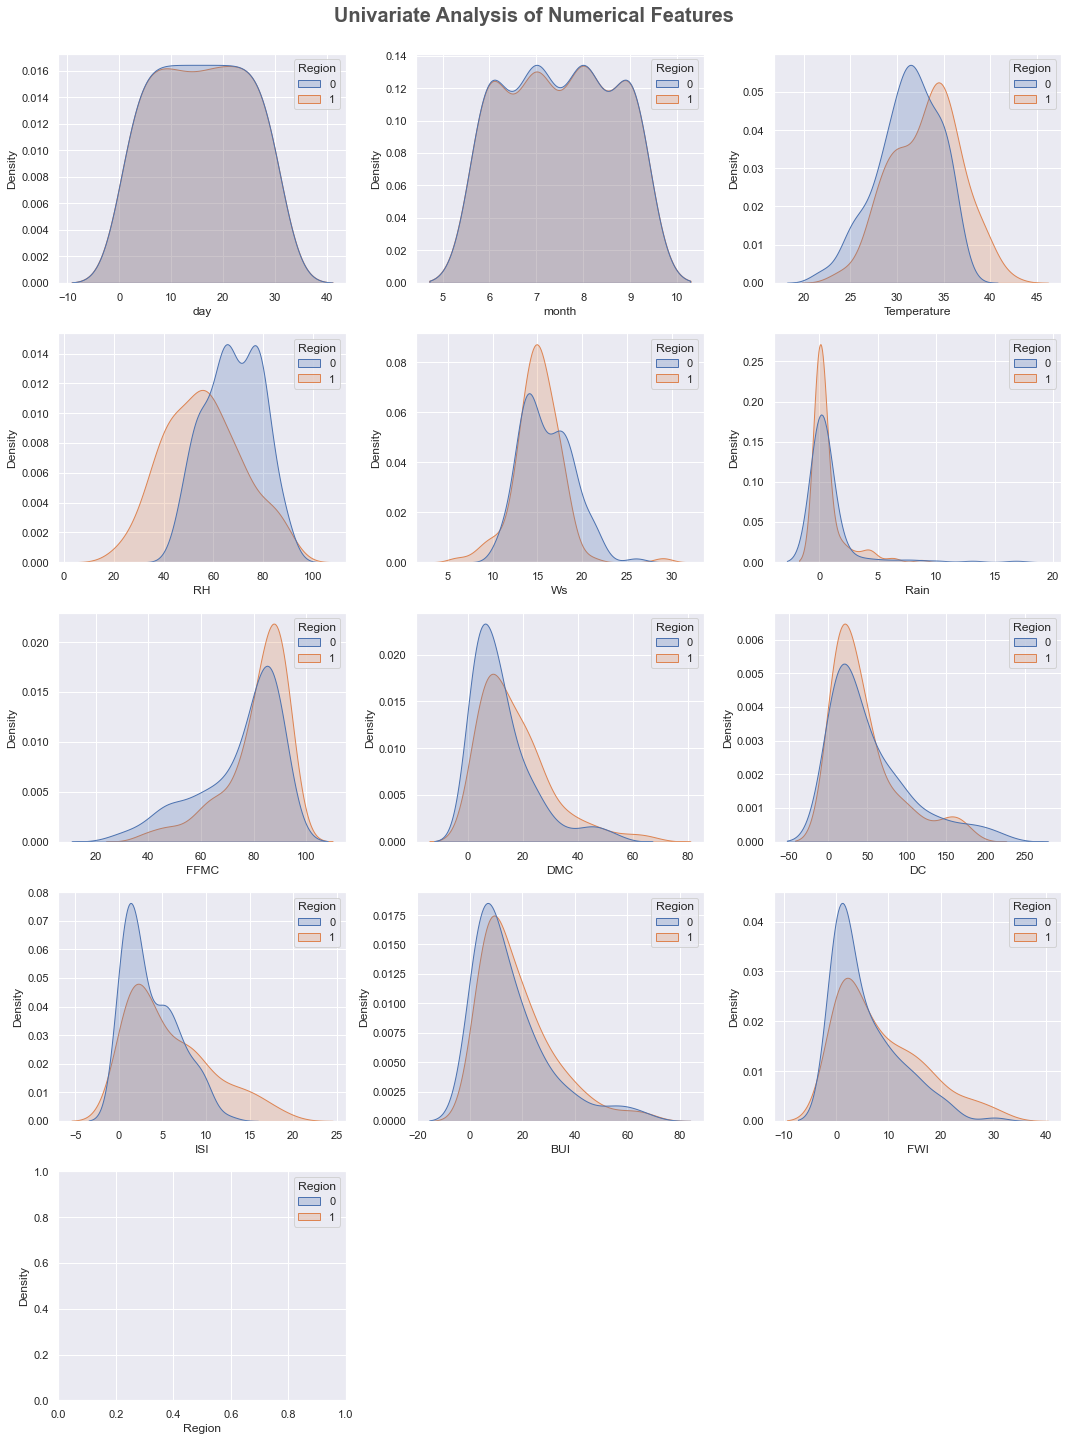

In [56]:
#Distribution Numerical Features of our Dataset
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df1[numerical_col[i]],shade=True, color='b',hue='Region',data=df1)
    plt.xlabel(numerical_col[i])
    plt.tight_layout()

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>,
        <AxesSubplot:title={'center':'FWI'}>],
       [<AxesSubplot:title={'center':'Region'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

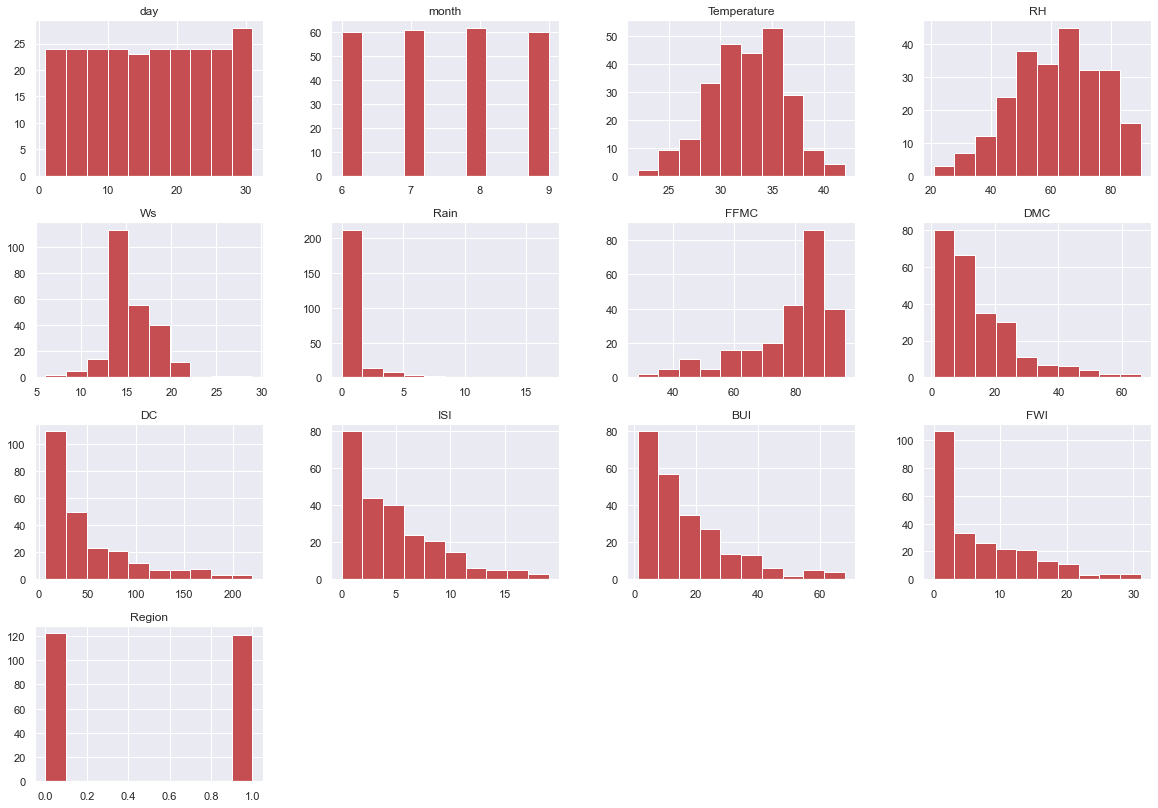

In [57]:
df1.hist(figsize=(20,14),color='r')

Percentage for Pie Chart

In [58]:
percentage=df.Classes.value_counts(normalize=True)*100
percentage

fire        56.378601
not fire    43.621399
Name: Classes, dtype: float64

Plotting Pie chart

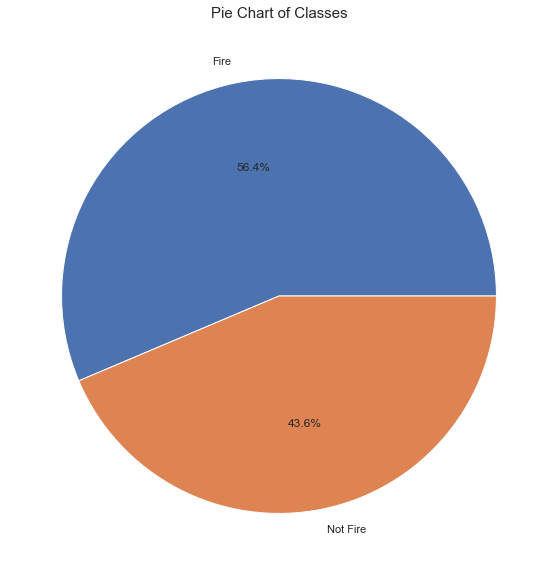

In [59]:
classes_labels=['Fire','Not Fire']
plt.figure(figsize=(15,10))
plt.pie(percentage,labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

# Forest Fire Temperature Box Plot

<AxesSubplot:xlabel='Temperature'>

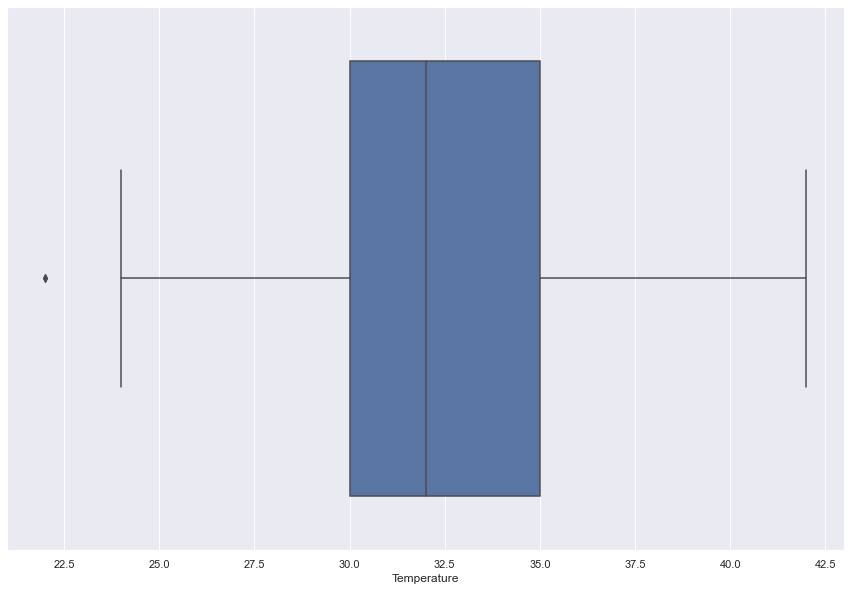

In [60]:
sns.boxplot(df1['Temperature'])

<AxesSubplot:xlabel='FWI'>

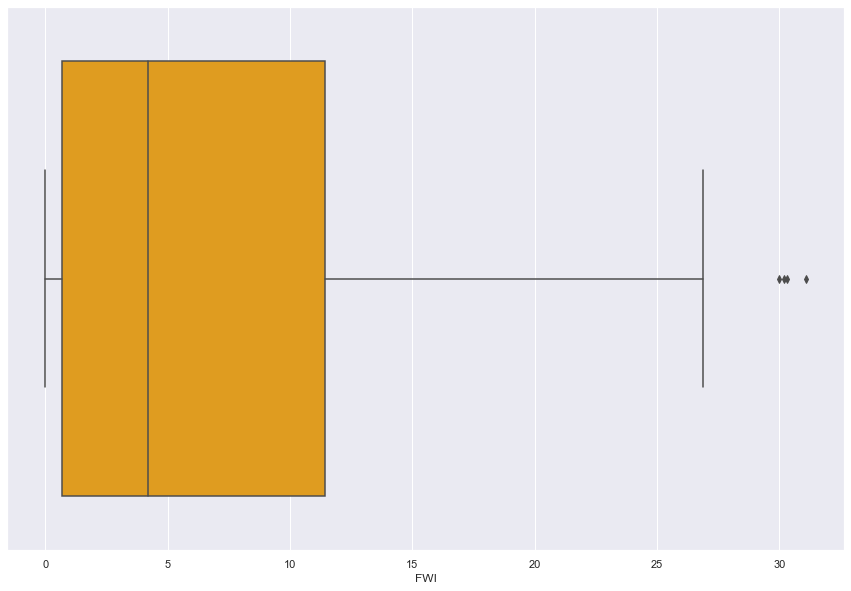

In [61]:
sns.boxplot(df1['FWI'],color='orange')

<AxesSubplot:xlabel='Classes', ylabel='count'>

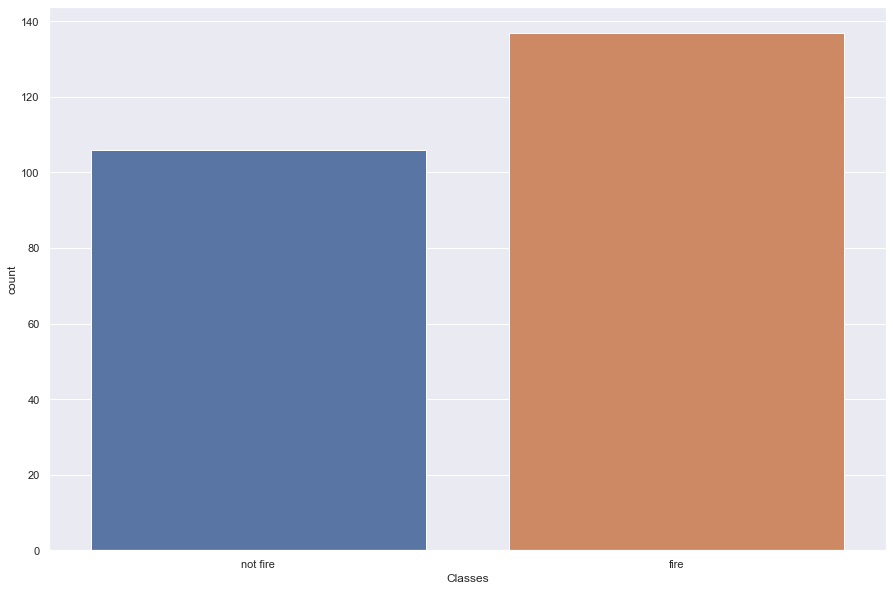

In [62]:
sns.countplot(df['Classes'])

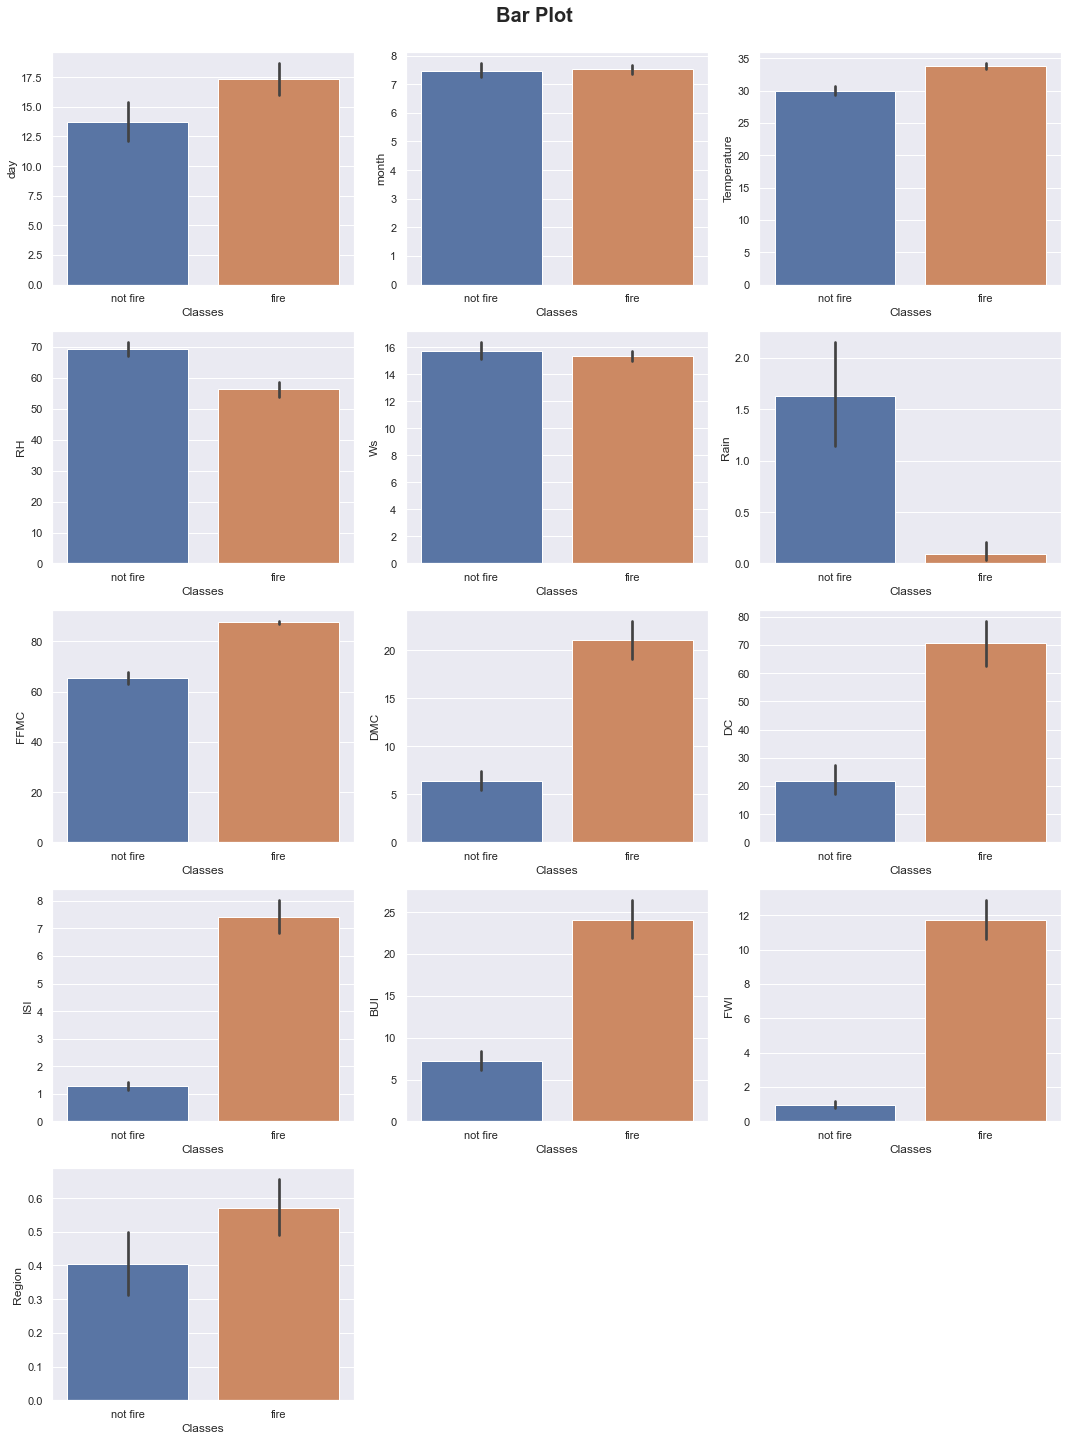

In [63]:
plt.figure(figsize=(15, 20))
plt.suptitle('Bar Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_col)):
    plt.subplot(5, 3, i+1)
    sns.barplot(y=numerical_col[i], x='Classes', data=df1)
    plt.tight_layout()

# 

**Plotting Relation Between Temperature & Fire**


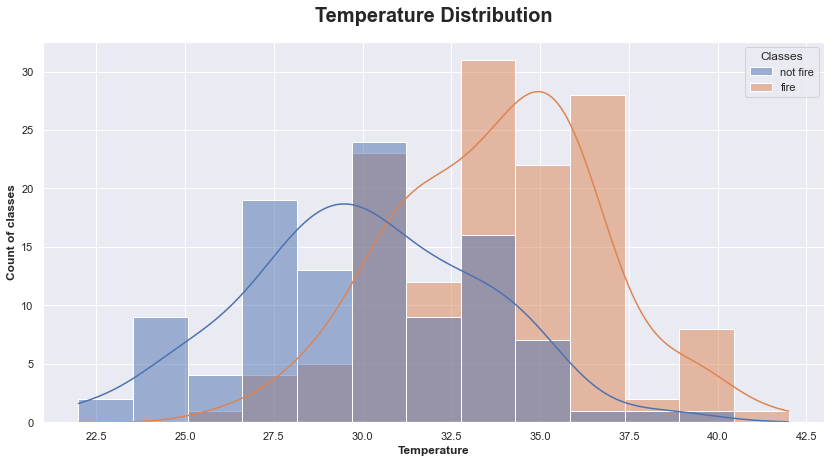

In [64]:
features = ['Temperature', 'Classes']
Temperature_df = df1[features]
plt.subplots(figsize=(14,7))
sns.histplot( data=Temperature_df,x=Temperature_df['Temperature'], hue='Classes', color = 'g',kde=True)
#sns.histplot(Temperature_df.Temperature, color='g', kde=True)
plt.title("Temperature Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count of classes", weight="bold", fontsize=12)
plt.xlabel("Temperature", weight="bold", fontsize=12)
plt.show()

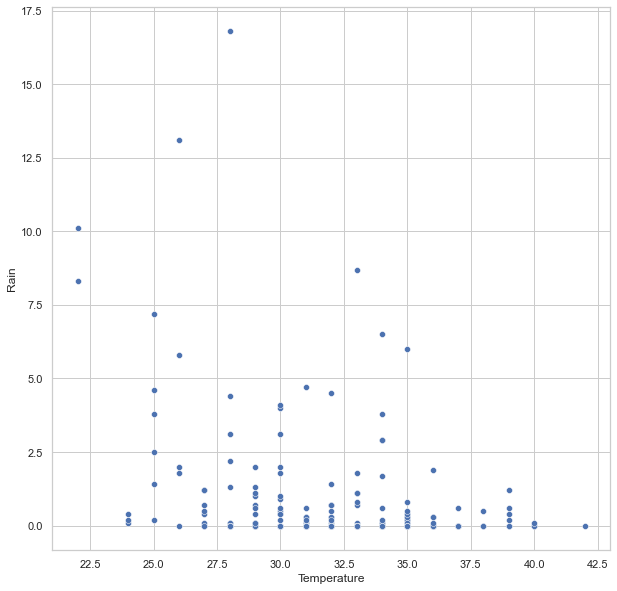

In [65]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.scatterplot(x=df1['Temperature'],y=df1['Rain'],data=df1)
df1['Temperature'].corr(df1['Rain'])
plt.show()

**Model buidling **

In [66]:
#Train Test Split
X = df1.drop(['Classes'],axis=1)


In [70]:

y=df1['Classes']

In [71]:
X

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
242,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


**Feature Scaling**


In [72]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(170, 13) (73, 13)
(170,) (73,)


In [73]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

170
170
73
73


**Logistic Regression**



Logistic Regression is the extension of ‘Linear regression’. Target variable in linear regression model will be continuous. Whereas in this algorithm the target variable will be discrete. So if our prediction needs to be discrete, we can use Logistic regression. We need not get carried away from the name as it is holding “regression”. This algorithm is built for classification problems.

Classification problems are also called as binary problems, where the output will be between 2 classes. It is either 0 or 1/Yes or No. Function used in this algorithm is “Sigmoid” or “Logistic” which is represented as

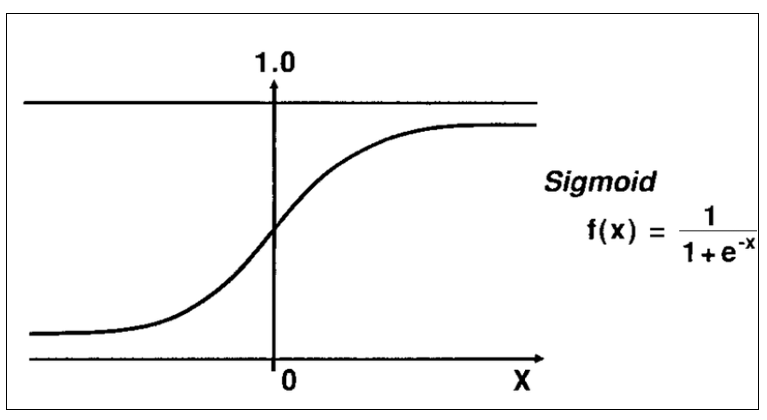

In [74]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [75]:
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

LogisticRegression()

In [76]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[ 0.06643782  0.39233243  0.43007364 -0.00707562  0.51689509  0.02974132
  -0.2208621   0.22249534 -0.07409664 -1.19280145  0.252481   -1.73218577
  -0.40950933]]
[0.08454297]


In [79]:
y_pred = log_reg.predict(X_test)

dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [78]:
dataset.head(10)

,Actual,Predicted
110,fire,fire
152,fire,fire
37,fire,fire
75,fire,fire
109,fire,fire
71,fire,fire
124,not fire,not fire
73,fire,fire
156,fire,fire
237,fire,fire


We can see from the above comparision between actual and predicted value that the accuracy of the model is good. Now let's calculate the performance metrics.

**Performance Metrics**

These are some frequently used metrics in industry for classification problems to measure accuracy percentages and error levels they are as follows:

a. Confusion Matrix, b. Classification Report, c. ROC Curve & d. Accuracy Score

**Confusion Matrix**

Confusion Matrix below is used to find the amount of values which are predicted correctly & wrongly

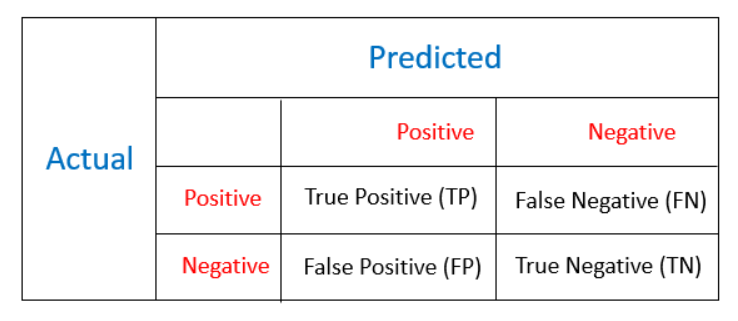

In [80]:
# Confusion Matrix

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat


array([[39,  4],
       [ 1, 29]], dtype=int64)

In [81]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

**Accuracy**

Accuracy is defined as the number of correct predictions over the total predictions: accuracy = correct_predictions / total_predictions

However, we can further expand on this using these:

True Positive (TP) - you predicted positive and it’s actually positive

True Negative (TN) - you predicted negative and it’s actually negative

False Positive (FP) - you predicted positive and it’s actually negative

False Negative (FN) - you predicted negative and it’s actually positive

So we can say the true predictions are TN+TP, while the false prediction is FP+FN. The equation can now be redefined as: image-3.png

In [82]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9315068493150684

**Precision and Recall**

If we want to further test the “accuracy” in different classes where we want to ensure that when the model predicts positive, it is in fact true positive - we use precision. We can also call this Positive Prediction Value which can be defined as: image.png

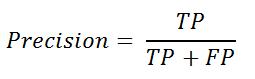

In [84]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9069767441860465

In [85]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.975

**F1 Score**

This is defined as Harmonic mean between Precision and Recall values 
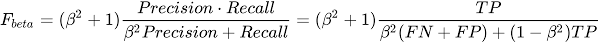

In [86]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9397590361445783